In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from keras import callbacks
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.optimizers import Adam
import keras.layers

C:\Users\TECHNO\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\TECHNO\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Reading DataSet
Emails = pd.read_csv('emails.csv')
Emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
## Exploratory Data

In [4]:
Emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
Emails.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
Emails.describe(include='object')

,text
count,5728
unique,5695
top,"Subject: re : contact info glenn , please , ..."
freq,2


In [7]:
round(Emails['spam'].value_counts() / len(Emails)* 100,2)

spam
0    76.12
1    23.88
Name: count, dtype: float64

C:\Users\TECHNO\anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


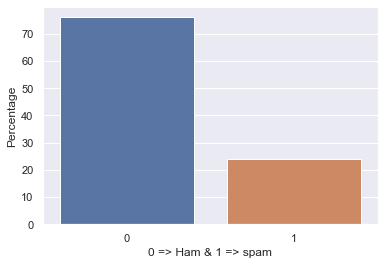

In [18]:
sns.barplot(x =[0,1] ,y=round(Emails['spam'].value_counts() / len(Emails)* 100,2))
plt.xlabel('0 => Ham & 1 => spam')
plt.ylabel('Percentage')
plt.show()

In [ ]:
## PreProcessing

In [3]:
Vectorize = CountVectorizer()
# text = ['I LOVE YOU', 'I ADMIRE YOU', 'I HATE YOU', 'I DON\'T LOVE YOU']
X = Vectorize.fit_transform(Emails.text).toarray()

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
y = Emails.spam

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
## Create Logistic Regrssion Model

In [52]:
LR_Model = LogisticRegression()

In [53]:
# Training Model

In [44]:
LR_Model.fit(X_train,y_train)

C:\Users\TECHNO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# Test Model

In [46]:
y_predict = LR_Model.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
# Evaluate Model

In [48]:
accuracy_score(y_test,y_predict)

0.9886561954624782

In [49]:
confusion_matrix(y_test,y_predict)

array([[853,   3],
       [ 10, 280]], dtype=int64)

In [50]:
## Create KNN Model

In [54]:
KNN_Model = KNeighborsClassifier()

In [55]:
# Training Model

In [56]:
KNN_Model.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
y_pred_KNN = KNN_Model.predict(X_test)

In [59]:
# Evaluate Model

In [61]:
accuracy_score(y_test,y_pred_KNN)

0.9092495636998255

In [62]:
confusion_matrix(y_test,y_pred_KNN)

array([[843,  13],
       [ 91, 199]], dtype=int64)

In [63]:
## Create Naive Bayes Model

In [79]:
GNB_Model = GaussianNB()
MNB_Model = MultinomialNB()
BNB_Model = BernoulliNB()

In [65]:
# Training Model

In [66]:
GNB_Model.fit(X_train,y_train)

GaussianNB()

In [72]:
MNB_Model.fit(X_train,y_train)

MultinomialNB()

In [80]:
BNB_Model.fit(X_train,y_train)

BernoulliNB()

In [ ]:
# Testing Model

In [69]:
y_pred_GNB = KNN_Model.predict(X_test)

In [73]:
y_pred_MNB = MNB_Model.predict(X_test)

In [82]:
y_pred_BNB = BNB_Model.predict(X_test)

In [67]:
# Evaluate Model

In [70]:
accuracy_score(y_test,y_pred_GNB)

0.9092495636998255

In [74]:
accuracy_score(y_test,y_pred_MNB)

0.9912739965095986

In [83]:
accuracy_score(y_test,y_pred_BNB)

0.981675392670157

In [84]:
## Create SVM Model

In [8]:
SVC_Model = SVC()

In [86]:
# Training Model

In [9]:
SVC_Model.fit(X_train,y_train)

In [ ]:
# Testing Model

In [ ]:
y_pred_SVC = SVC_Model.predict(X_test)

In [ ]:
# Evaluating Model

In [ ]:
accuracy_score(y_test,y_pred_SVC)

In [ ]:
## Create Model Decision Tree & Random Forest Model

In [8]:
DT_Model = DecisionTreeClassifier()
RF_Model = RandomForestClassifier()

In [ ]:
# Training Model

In [9]:
DT_Model.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
RF_Model.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
# Testing Model

In [13]:
y_pred_DT = DT_Model.predict(X_test)

In [14]:
y_pred_RF = RF_Model.predict(X_test)

In [15]:
# Evaluating Model

In [16]:
accuracy_score(y_test,y_pred_DT)

0.9502617801047121

In [17]:
accuracy_score(y_test,y_pred_RF)

0.956369982547993

In [21]:
# def predict(X_train,y_train,X_test,y_test):
#     Models = {'Decision Tree':DecisionTreeClassifier(),
#               'Random Forest':RandomForestClassifier(),
#               'K-Nearst-Neighbours':KNeighborsClassifier(),
#               'Gaussian Naive Bayes':GaussianNB(),
#               'Multinomial Naive Bayes':MultinomialNB(),
#               'Bernoulli Naive Bayes':BernoulliNB(),
#               'Logistic Regression': LogisticRegression()
#               }
#     accuracy = []
#     names = []
#     for name, model in Models.items():
#         names.append(name)
        
#         model.fit(X_train, y_train)
#         accuracy.append(model.score(X_test,y_test))
        
#     df = pd.DataFrame({'Model_Name':names, 'Accuracy':accuracy})
#     return df.sort_values(by='Accuracy',ascending= False)

In [22]:
# predict(X_train,y_train,X_test,y_test)

c:\Users\TECHNO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model_Name,Accuracy
4,Multinomial Naive Bayes,0.991274
6,Logistic Regression,0.988656
5,Bernoulli Naive Bayes,0.981675
1,Random Forest,0.961606
3,Gaussian Naive Bayes,0.958115
0,Decision Tree,0.952007
2,K-Nearst-Neighbours,0.909250


In [8]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

#layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 25, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/25
115/115 [==============================] - 3s 17ms/step - loss: 0.6877 - accuracy: 0.7533 - val_loss: 0.6735 - val_accuracy: 0.7775
Epoch 2/25
115/115 [==============================] - 2s 15ms/step - loss: 0.6219 - accuracy: 0.7615 - val_loss: 0.5342 - val_accuracy: 0.7775
Epoch 3/25
115/115 [==============================] - 2s 15ms/step - loss: 0.5014 - accuracy: 0.7615 - val_loss: 0.4201 - val_accuracy: 0.7775
Epoch 4/25
115/115 [==============================] - 2s 16ms/step - loss: 0.3796 - accuracy: 0.7626 - val_loss: 0.3175 - val_accuracy: 0.7950
Epoch 5/25
115/115 [==============================] - 2s 16ms/step - loss: 0.2827 - accuracy: 0.8846 - val_loss: 0.2474 - val_accuracy: 0.9117
Epoch 6/25
115/115 [==============================] - 2s 16ms/step - loss: 0.2150 - accuracy: 0.9626 - val_loss: 0.1941 - val_accuracy: 0.9509
Epoch 7/25
115/115 [==============================] - 2s 16ms/step - loss: 0.1571 - accuracy: 0.9834 - val_loss: 0.1481 - val_accuracy: 0.9662

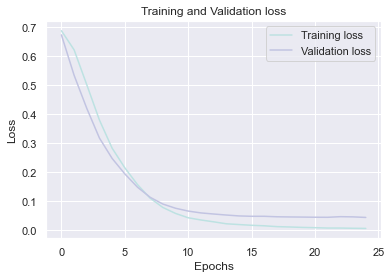

In [9]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [10]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

36/36 [==============================] - 0s 7ms/step


In [11]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [12]:
# confusion matrix
# cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
# plt.subplots(figsize=(12,8))

confusion_matrix(y_test, y_pred)
# sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15})

array([[855,   1],
       [ 14, 276]], dtype=int64)

In [13]:
accuracy_score(y_test, y_pred)

0.9869109947643979

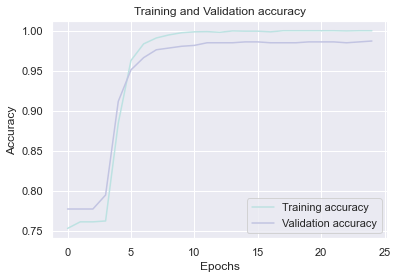

In [14]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01,  # minimum amount of change to count as an improvement
    patience=20,  # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Reshape the input data dimensions
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Initialising the NN
model = Sequential()

# Layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
opt = Adam()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size=32, epochs=20, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/20
  7/115 [>.............................] - ETA: 25:43:01 - loss: 0.6876 - accuracy: 0.7176